In [1]:
#Import neceassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lodad data
Masterdata=pd.read_csv('C:/Users/leksh/Documents/spring board/Specialization/accepted_2007_to_2018Q4.csv')

C:\Users\leksh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,57,114,115,116,119,120,121,124,130,131,132) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploring Data

In [3]:
#Check the top five rows
Masterdata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Check number of rows and columns
Masterdata.shape

(1048575, 136)

The original dataset has 1048575 rows and 136 columns

In [5]:
#Check variable types
Masterdata.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 136, dtype: object

In [6]:
#Checking loan status
Masterdata['loan_status'].value_counts(normalize=True)

Fully Paid            0.460244
Current               0.400119
Charged Off           0.123204
Late (31-120 days)    0.010375
In Grace Period       0.004031
Late (16-30 days)     0.002007
Default               0.000020
Name: loan_status, dtype: float64

The above results show that this is a highly imbalanced data set since 46 percent are fully paid, 40 percent are current and only 2 percent are defaulters.

The loans for which status is either fully paid or default are only considered for further analysis.

In [7]:
Cleandata=Masterdata[Masterdata['loan_status'].isin(['Fully Paid','Default'])]
Cleandata.shape

(482616, 136)

In [8]:
Cleandata['loan_status'].describe()

count         482616
unique             2
top       Fully Paid
freq          482595
Name: loan_status, dtype: object

Now the dataset has 482616 rows and 136 columns

# Missing Values

In [9]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Cleanrdata 
missing =Cleandata.isnull().sum(axis=0)
pd.options.display.max_rows=None
display(missing)

id                                                 0
member_id                                     482616
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      28170
emp_length                                     27918
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
purpose                                       

In [10]:
#Drop all columns which are theoretically not supposed to have a relationship with loan status and also which has  more than 80 percent missing values 
Cleandata=Cleandata.drop(['member_id' ,'settlement_status','annual_inc_joint', 'title','dti_joint', 'mths_since_last_record','revol_util','next_pymnt_d','hardship_start_date','hardship_end_date','issue_d', 'payment_plan_start_date','settlement_status', 'settlement_date','settlement_amount','percent_bc_gt_75','num_tl_120dpd_2m','settlement_percentage','orig_projected_additional_accrued_interest','settlement_term','debt_settlement_flag_date','policy_code','zip_code','addr_state','recoveries','collection_recovery_fee','fico_range_high','hardship_payoff_balance_amount','hardship_last_payment_amount','disbursement_method','hardship_length','hardship_dpd','deferral_term'],axis=1)

In [11]:
Cleandata.shape

(482616, 104)

Now, there are 482616 rows and 117 columns in the new dataset. The missing values are checked in the new data set below.

In [12]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Cleandata 
missing =Cleandata.isnull().sum(axis=0)
pd.options.display.max_rows=None
display(missing)

id                                     0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                          28170
emp_length                         27918
home_ownership                         0
annual_inc                             0
verification_status                    0
loan_status                            0
pymnt_plan                             0
purpose                                0
dti                                  181
delinq_2yrs                            0
earliest_cr_line                       0
fico_range_low                         0
inq_last_6mths                         0
mths_since_last_delinq            237585
open_acc                               0
pub_rec         

In [13]:
pd.options.display.max_rows=None
display(Cleandata.dtypes)

id                                 object
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
loan_status                        object
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
earliest_cr_line                   object
fico_range_low                    float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          

Many  categorical features have missing values. Different from those in numeric variables, these missing values may not need to be imputed. Many of these might be  left for reasons and could affect the model performance, so  they can be  treated as a special category

In [14]:
# Fill the missing values as -1 for categorical variables since they need to be treated as special categories
Cleandata['emp_title'].fillna(-1,inplace = True)
Cleandata['emp_length'].fillna(-1,inplace = True)
Cleandata['hardship_status'].fillna(-1,inplace = True)
Cleandata['hardship_reason'].fillna(-1,inplace = True)
Cleandata['hardship_type'].fillna(-1,inplace = True)
Cleandata['hardship_loan_status'].fillna(-1,inplace = True)
Cleandata['verification_status_joint'].fillna(-1,inplace = True)
Cleandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_amount,hardship_loan_status,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,7746.0,2400.0,13734.0,N,-1,-1,-1,NaN,-1,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,39475.0,79300.0,24667.0,N,-1,-1,-1,NaN,-1,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,18696.0,6200.0,14877.0,N,-1,-1,-1,NaN,-1,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,95768.0,20300.0,88097.0,N,-1,-1,-1,NaN,-1,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,12798.0,9400.0,4000.0,N,-1,-1,-1,NaN,-1,N


# Conversion of Categorical Variables

In [15]:
# Convert the loan  status  variables to numerical values
Cleandata["loan_status"].replace({"Fully Paid":0,"Default":1},inplace=True)
Cleandata.head()



,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_amount,hardship_loan_status,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,7746.0,2400.0,13734.0,N,-1,-1,-1,NaN,-1,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,39475.0,79300.0,24667.0,N,-1,-1,-1,NaN,-1,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,18696.0,6200.0,14877.0,N,-1,-1,-1,NaN,-1,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,95768.0,20300.0,88097.0,N,-1,-1,-1,NaN,-1,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,...,12798.0,9400.0,4000.0,N,-1,-1,-1,NaN,-1,N


In [16]:
pd.options.display.max_rows=None
display(Cleandata.dtypes)

id                                 object
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
loan_status                         int64
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
earliest_cr_line                   object
fico_range_low                    float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          

In [17]:
#Finding the categories in home ownership
print(Cleandata['home_ownership'].unique())

['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']


In [18]:
#Converting the categories of homeownership to numerical values
Cleandata["home_ownership"].replace({"NONE":0,"OWN":1,"ANY":2,"RENT":3,"MORTGAGE":4},inplace=True)
print(Cleandata['home_ownership'].unique())

[4 3 1 2 0]


Converting Categorical Variables to Numerical Variables

In [19]:
#Finding the categories in employment length
print(Cleandata['emp_length'].unique())

['10+ years' '3 years' '4 years' '6 years' '8 years' '2 years' '9 years'
 '< 1 year' '1 year' '5 years' -1 '7 years']


In [20]:
##Converting the categories of employment length to numerical values
Cleandata["emp_length"].replace({"< 1 year":0, "1 year":1, "2 years":2,"3 years":3, "4 years":4,"5 years":5,"6 years":5,"7 years":5,"8 years":5,"9 years":5,"10+ years":6},inplace=True)
print(Cleandata['emp_length'].unique())

[ 6  3  4  5  2  0  1 -1]


In [21]:
#Finding the categories in hardship status
print(Cleandata['hardship_status'].unique())


[-1 'COMPLETED' 'BROKEN']


In [22]:
#Converting the categories of hardhsip status to numerical values
Cleandata["hardship_status"].replace({"COMPLETED":1,"BROKEN":0},inplace=True)
print(Cleandata['hardship_status'].unique())

[-1  1  0]


In [23]:
#Finding the categories in hardship reason
print(Cleandata['hardship_reason'].unique())

[-1 'NATURAL_DISASTER' 'EXCESSIVE_OBLIGATIONS' 'DISABILITY' 'UNEMPLOYMENT'
 'REDUCED_HOURS' 'FAMILY_DEATH' 'INCOME_CURTAILMENT' 'MEDICAL' 'DIVORCE']


In [24]:
#Converting the categories of hardhsip reason to numerical values
Cleandata["hardship_reason"].replace({"NATURAL_DISASTER":1, "EXCESSIVE_OBLIGATIONS":2, "DISABILITY":3,"UNEMPLOYMENT":4, "REDUCED_HOURS":5,"FAMILY_DEATH":6,"INCOME_CURTAILMENT":7,"MEDICAL":8,"DIVORCE":9},inplace=True)
print(Cleandata['hardship_reason'].unique())

[-1  1  2  3  4  5  6  7  8  9]


In [25]:
#Finding the categories in hardship type
print(Cleandata['hardship_type'].unique())

[-1 'INTEREST ONLY-3 MONTHS DEFERRAL']


In [26]:
##Converting the categories of hardhsip type to numerical values
Cleandata["hardship_type"].replace({"INTEREST ONLY-3 MONTHS DEFERRAL":1, },inplace=True)
print(Cleandata['hardship_type'].unique())

[-1  1]


In [27]:
#Finding the categories in debt_settlement_flag  
print(Cleandata['debt_settlement_flag'].unique())

['N' 'Y']


In [28]:
##Converting the categories of debt_settlement_flag   to numerical values
Cleandata["debt_settlement_flag"].replace({"Y":1,"N":0},inplace=True)
print(Cleandata['debt_settlement_flag'].unique())

[0 1]


In [29]:
#Finding the categories in verification_status_joint 
print(Cleandata['verification_status_joint'].unique())

[-1 'Not Verified' 'Verified' 'Source Verified']


In [30]:
##Converting the categories of verification_status_joint    to numerical values
Cleandata["verification_status_joint"].replace({"Not Verified":0,"Verified":1,"Source Verified":2},inplace=True)
print(Cleandata['verification_status_joint'].unique())

[-1  0  1  2]


In [31]:
#Finding the categories in purpose
print(Cleandata['purpose'].unique())

['debt_consolidation' 'small_business' 'home_improvement' 'major_purchase'
 'credit_card' 'other' 'house' 'vacation' 'medical' 'car' 'moving'
 'renewable_energy' 'wedding' 'educational']


In [32]:
##Converting the categories of purpose   to numerical values
Cleandata["purpose"].replace({"debt_consolidation":1,"small_business":2,"home_improvement":3,'major_purchase':4,'credit_card':5,'house':6,'medical':7,'car':8,'educational':9,'moving':10,'other':10,'vacation':10,'wedding':10,'renewable_energy':10},inplace=True)
print(Cleandata['purpose'].unique())

[ 1  2  3  4  5 10  6  7  8  9]


# Duplicates

# Checking for Duplicates

In [33]:
Cleandata.duplicated().sum()

0

There are no duplicate values

# Checking for Outliers

<AxesSubplot:xlabel='annual_inc'>

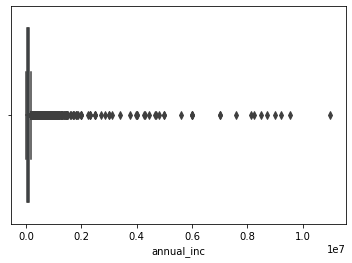

In [34]:
#Checking for  annual income outliers
sns.boxplot( x=Cleandata["annual_inc"])

The boxplot is showing strange features.Hence to analyze annual income  in detail, we use the describe function in Python

In [35]:
Cleandata['annual_inc'].describe()

count    4.826160e+05
mean     7.852227e+04
std      7.492395e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.500000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [36]:
#To understand the minimum value in decimal 
from decimal import Decimal
min =0.000000e+00
print(Decimal(min)) 

0


In [37]:
#To understand the maximum value in decimal 
from decimal import Decimal
max =1.099920e+07
print(Decimal(max)) 

10999200


In [38]:
#To find the standard deviation in decimal
std= 7.492395e+04
print(Decimal(std))

74923.949999999997089616954326629638671875


In [39]:
#Remove all the rows where annual income  is greater than  three times the standard deviation
Cleandata.drop(Cleandata[Cleandata['annual_inc']>3*74923.949999999997089616954326629638671875].index , inplace=True)
Cleandata.shape

(473544, 104)

<AxesSubplot:xlabel='annual_inc'>

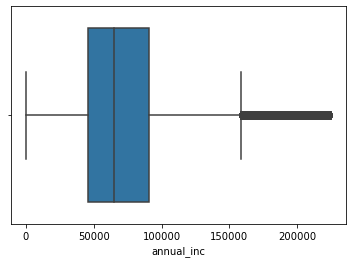

In [40]:
#Now checking the outliers for annual income 
sns.boxplot( x=Cleandata["annual_inc"])

<AxesSubplot:xlabel='fico_range_low'>

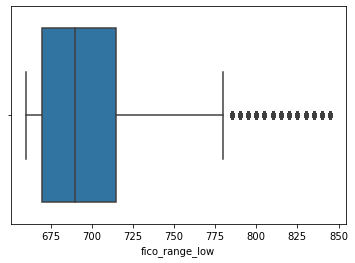

In [41]:
#Checking for outliers in Ficoscore low range
sns.boxplot( x=Cleandata["fico_range_low"])

<AxesSubplot:xlabel='loan_amnt'>

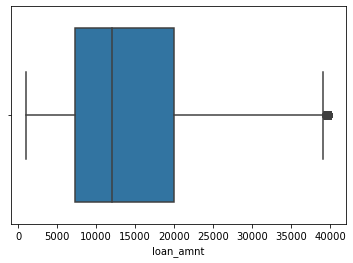

In [42]:
sns.boxplot( x=Cleandata["loan_amnt"])

<AxesSubplot:xlabel='int_rate'>

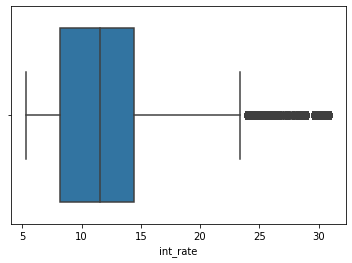

In [43]:
sns.boxplot( x=Cleandata["int_rate"])

<AxesSubplot:xlabel='installment'>

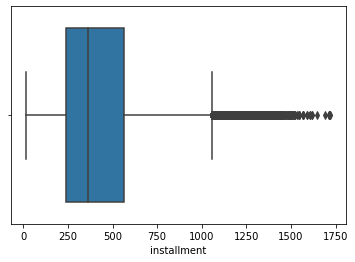

In [44]:
sns.boxplot( x=Cleandata["installment"])

# Exploratory Data Analysis

In [45]:
Cleandata.shape

(473544, 104)

In [46]:
Cleandata.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_type,hardship_reason,hardship_status,hardship_amount,debt_settlement_flag
loan_amnt,1.000000,1.000000,0.999994,0.095852,0.955988,0.100892,0.103742,0.474633,2.629454e-04,-0.164302,...,-0.002194,0.332311,0.259150,0.382263,0.176447,0.013159,0.011306,0.012919,0.683691,-0.002119
funded_amnt,1.000000,1.000000,0.999994,0.095852,0.955988,0.100892,0.103742,0.474633,2.629454e-04,-0.164302,...,-0.002194,0.332311,0.259150,0.382263,0.176447,0.013159,0.011306,0.012919,0.683691,-0.002119
funded_amnt_inv,0.999994,0.999994,1.000000,0.095705,0.955932,0.100934,0.103753,0.474700,2.673054e-04,-0.164269,...,-0.002212,0.332359,0.259137,0.382340,0.176437,0.013150,0.011294,0.012910,0.683584,-0.002117
int_rate,0.095852,0.095852,0.095705,1.000000,0.113095,-0.015395,-0.037286,-0.131607,7.846370e-03,-0.030685,...,0.012157,-0.104848,0.015602,-0.240411,0.009624,0.015667,0.015299,0.015446,0.546173,0.001819
installment,0.955988,0.955988,0.955932,0.113095,1.000000,0.087441,0.083803,0.451337,2.262009e-04,-0.159657,...,0.004926,0.295122,0.242443,0.347759,0.160857,0.017309,0.015022,0.017029,0.614348,-0.002129
emp_length,0.100892,0.100892,0.100934,-0.015395,0.087441,1.000000,0.092078,0.170795,-2.783681e-04,-0.033184,...,0.009201,0.127509,0.031024,0.055881,0.023992,-0.002272,-0.003504,-0.002023,0.085138,-0.000734
home_ownership,0.103742,0.103742,0.103753,-0.037286,0.083803,0.092078,1.000000,0.158931,-1.961613e-03,-0.047492,...,-0.002848,0.315336,0.085407,0.045679,0.080114,-0.003196,-0.002582,-0.003304,0.042418,-0.004208
annual_inc,0.474633,0.474633,0.474700,-0.131607,0.451337,0.170795,0.158931,1.000000,-2.615791e-03,-0.023059,...,0.044665,0.537538,0.399137,0.371274,0.346715,-0.001194,-0.001671,-0.001419,0.311733,-0.002563
loan_status,0.000263,0.000263,0.000267,0.007846,0.000226,-0.000278,-0.001962,-0.002616,1.000000e+00,-0.001051,...,0.000614,-0.000601,-0.001579,-0.001287,-0.001276,0.006382,0.006739,0.006494,0.088456,0.267245
purpose,-0.164302,-0.164302,-0.164269,-0.030685,-0.159657,-0.033184,-0.047492,-0.023059,-1.050705e-03,1.000000,...,-0.001382,-0.032074,-0.014310,-0.006683,-0.015155,-0.007178,-0.007293,-0.007140,-0.160323,0.001614


Correlation is a technique for investigating the relationship between two quantitative, continuous variables in order to represent their inter-dependenciesThe  initial analysis shows no correlation between loan status variable  and other variables. Loan amount is found to have strong  and positive correlation with installment,annual income,total payment and hardhsip amount.